# HOMEWORK 3 
# CS584 MACHINE LEARNING 
# JULEN FERRO BAÑALES
This Jupyter Notebook will include the coding of the Homework 3 related to the subject CS584 Machine Learning, as well as some comments made.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import csv
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



Now, some basic auxiliary functions will be defined.

In [ ]:

def cleaning(df):
    df = df.drop(['rightdown'], axis=1, level= 1)
    df = df.drop(['topleft'], axis=1, level= 1)
    return df

The first thing that must be done, is to read the CSV file with the location data that has been obtained after processing the mice images.

In [ ]:
 
# reading the CSV file
path = r"C:\Users\ferro\Desktop\Disco Duro (17-08-2022) PRE-CHICAGO\DRIVE\University ( 28-11-2020 )\Master\Chicago IIT\Julen Subjects CHICAGO IIT\S1\CS 584 Machine Learning\Assignments\HW_3\A20512110_CollectedData_annotation.csv"

df = pd.read_csv(path , header = [0, 1, 2, 3])
df = pd.DataFrame(df) 

size = os.path.getsize(r"C:\Users\ferro\Desktop\Disco Duro (17-08-2022) PRE-CHICAGO\DRIVE\University ( 28-11-2020 )\Master\Chicago IIT\Julen Subjects CHICAGO IIT\S1\CS 584 Machine Learning\Assignments\HW_3\A20512110_CollectedData_annotation.csv")

# displaying the contents of the CSV file
df.head()


scorer Unnamed: 1_level_0  \
    individuals Unnamed: 1_level_1   
      bodyparts Unnamed: 1_level_2   
         coords Unnamed: 1_level_3   
0  labeled-data               24.0   
1  labeled-data               24.0   
2  labeled-data               24.0   
3  labeled-data               24.0   
4  labeled-data               24.0   

                                  Unnamed: 2_level_0  annotation              \
                                  Unnamed: 2_level_1      mouse1               
                                  Unnamed: 2_level_2     topleft               
                                  Unnamed: 2_level_3           x           y   
0  A_male_in_a_new_cage_face_view_3_2022-08-10_15...  273.048052   12.903231   
1  A_male_in_a_new_cage_face_view_3_2022-08-10_15...  286.152150  140.449787   
2  A_male_in_a_new_cage_face_view_3_2022-08-10_15...  238.977396  154.427492   
3  A_male_in_a_new_cage_face_view_3_2022-08-10_15...  230.241331  166.657984   
4  A_male_in_a_new_cage_face_view_3_2022-08-10_15...  233.735757  173.646836   

                                                                           \
                                                                            
    rightdown                    nose                 leftear               
            x           y           x           y           x           y   
0  544.739689  331.769622  517.657886   21.639296  504.553788   51.341919   
1  516.784280  315.171098  515.910673  175.394049  488.828870  148.312246   
2  394.479362  225.189623  247.713462  212.085524  267.806412  203.349459   
3  310.613133  239.167328  287.899363  192.866180  273.048052  184.130115   
4  299.256248  261.007491  240.724609  187.624541  251.207888  191.118967   

                                                                           \
                                                                            
     rightear                 leftHip                rightHip               
            x           y           x           y           x           y   
0  464.367887   59.204378  532.509198  169.278803  481.840018  168.405197   
1  457.379034  152.680279  478.345591  234.799295  425.055592  229.557655   
2  272.174445  198.107820  300.129855  198.107820  303.624281  187.624541   
3  280.036904  196.360606  253.828707  196.360606  269.553625  210.338311   
4  258.196740  185.003721  257.323134  208.591098  287.899363  194.613393   

                                                                             \
                                                   mouse2                     
     tailBase                 tailEnd             topleft     rightdown       
            x           y           x           y       x   y         x   y   
0  462.620673  251.397819  307.118707  295.951753     NaN NaN       NaN NaN   
1  412.825100  262.754704  293.141002  285.468475     NaN NaN       NaN NaN   
2  336.821330  189.371754  404.089034  217.327164     NaN NaN       NaN NaN   
3  245.092642  221.695196  303.624281  234.799295     NaN NaN       NaN NaN   
4  281.784117  224.316016  252.955101  259.260278     NaN NaN       NaN NaN   

                                                                           \
                                                                            
  nose     leftear     rightear     leftHip     rightHip     tailBase       
     x   y       x   y        x   y       x   y        x   y        x   y   
0  NaN NaN     NaN NaN      NaN NaN     NaN NaN      NaN NaN      NaN NaN   
1  NaN NaN     NaN NaN      NaN NaN     NaN NaN      NaN NaN      NaN NaN   
2  NaN NaN     NaN NaN      NaN NaN     NaN NaN      NaN NaN      NaN NaN   
3  NaN NaN     NaN NaN      NaN NaN     NaN NaN      NaN NaN      NaN NaN   
4  NaN NaN     NaN NaN      NaN NaN     NaN NaN      NaN NaN      NaN NaN   

               
               
  tailEnd      
        x   y  
0     NaN NaN  
1     NaN NaN  
2     NaN NaN  
3     NaN NaN  
4     NaN NaN

 Now, the dataset will be processed in order to get the dataset structure needed to feed the Neural Network. 

In [ ]:
rows = len(df) #getting the number of data examples that we have

# if we want to sample the data in order to mix it
df = df.sample(frac = 1.00)

df = df.iloc[: , 3:]
#print(df)

#getting rid of the possible NaN values
th = 1
df = df.dropna(axis = 0)
df.fillna(value = 200.000)
rows_na = len(df)

mouse1 = df.xs('mouse1', level=1, axis=1)
mouse1 = mouse1.dropna(axis = 0)
mouse2 = df.xs('mouse2', level=1, axis=1)
mouse2 = mouse2.dropna(axis = 0)

# we add as rows the mouse2 samples' data taken in pictures where more than one mice were found
#df = pd.concat([mouse1, mouse2], axis=0)
df = mouse1.append(mouse2)

# we create one dataset per axis with data related to its own axis
df_x = df.xs('x', level=2, axis=1)
df_y = df.xs('y', level=2, axis=1)

# we calculate the average location of the mice in both axis
x_cg = (df_x.xs('topleft', level=1, axis=1) + df_x.xs('rightdown', level=1, axis=1)) / 2
y_cg = (df_y.xs('topleft', level=1, axis=1) + df_y.xs('rightdown', level=1, axis=1)) / 2

# renaming the columns of the dataframes
x_cg.rename(columns = {'annotation':'x_location'}, inplace = True)
y_cg.rename(columns = {'annotation':'y_location'}, inplace = True)

# we get rid of the data used for calculating the average location of the mice in both axis
df = cleaning(df)
df_x = cleaning(df_x)
df_y = cleaning(df_y)

# we add to df the calculated average location of the mice in both axis
df = df.assign(x_locatin = x_cg)
df = df.assign(y_location = y_cg)

#print(df_x)
# df_x is a dataset made up of 187 rows and 7 columns corresponding to the attributes

#print(df_y)
# df_y is a dataset made up of 187 rows and 7 columns corresponding to the attributes

#print(df)
# df is a dataset made up of 187 rows and 16 columns ( 7 attributes per axis + one location per axis)

#print(df.shape)



58 rows were eliminated due to issues related to NaN values




In this next step, the fed datasets will be divided in training and testing datasets.

In [ ]:
coef = 0.2

# x_cg and y_cg will be the respective results for the testing and training of the 7 atributes fed Neural Network
# y_2d will be the respective result for the testing and training of the 14 atributes fed Neural Network

y_2d = pd.concat([x_cg, y_cg], axis = 1)

in_x_train, in_x_test, out_x_train, out_x_test = train_test_split(df_x, x_cg, test_size = coef)
in_y_train, in_y_test, out_y_train,  out_y_test = train_test_split(df_y, y_cg, test_size = coef)
in_2d_train, in_2d_test, out_2d_train, out_2d_test = train_test_split(df['annotation'], y_2d, test_size = coef)

# just checking if the split is done properly according to the established 0.2 coefficient 

# print(in_x_test.shape)
# print(in_y_train.shape)
# print(in_2d_train.shape)
# print(in_2d_test.shape)




Now, we will print some of the useful datasets in order to see their structure before being fed to the Neural Network.

In [ ]:
in_x_train.head(5)

annotation                                                              \
           nose     leftear    rightear     leftHip    rightHip    tailBase   
36   207.527560  236.356576  250.334281  310.613133  270.427232  382.248871   
28   361.282313  348.178215  372.639199  349.051822  373.512805  363.029526   
85   383.122477  413.698706  403.215428  460.873460  462.620673  483.587231   
122   71.244938   95.705922   93.958708  156.858380  162.100020  174.330511   
49   316.728379  311.486740  296.635429  267.806412  247.713462  234.609363   

                 
        tailEnd  
36   282.657724  
28   370.891985  
85   540.371657  
122  294.888215  
49   253.828707

In [ ]:
out_x_train.head(5)

,x_location
36,297.945838
28,359.535100
85,463.494280
122,174.767315
49,266.932806


In [ ]:
in_2d_train.head(5)

nose                 leftear                rightear              \
              x           y           x           y           x           y   
108  425.929198  236.546508  413.698706  221.695196  439.906903  224.316016   
92   289.646576  210.338311  270.427232  200.728639  273.921658  205.970279   
41   358.661494  291.583721  343.810182  253.145032  321.970019  261.007491   
45   538.624443  203.349459  529.014771  198.981426  508.048214  212.085524   
87   328.958871  178.014869  303.624281  170.152410  299.256248  178.014869   

        leftHip                rightHip                tailBase              \
              x           y           x           y           x           y   
108  393.605756  250.524213  433.791657  261.007491  392.732149  259.260278   
92   240.724609  207.717492  263.438380  217.327164  244.219035  219.074377   
41   300.129855  261.881098  263.438380  274.985196  272.174445  257.513065   
45   509.795427  256.639459  485.334444  262.754704  465.241493  276.732409   
87   259.943953  221.695196  252.955101  231.304869  235.482970  230.431262   

        tailEnd              
              x           y  
108  293.141002  287.215688  
92   228.494117  252.271426  
41   287.025756  241.788147  
45   358.661494  302.940606  
87   245.966248  221.695196

In [ ]:
out_2d_train.head(5)

,x_location,y_location
108,378.317641,249.650606
92,252.518298,215.143147
41,307.118707,260.133885
45,449.516575,243.535360
87,276.979281,210.775115


Here, the first model will be ran and its name will be "THE AXIS DEPENDENT MODEL". This model is caracterized by taking the 14 attributes as input, and giving two outputs as both coordinates of the location of the mouse.

As the first step, the Neural Network model will be created by using the Tensorflow library. Then, we have to keep building up the Neural Network by establishing some other parameters, and finally, the model will be ready for the training stage. 

In [ ]:
# For "THE DEPENDENT MODEL" the next datasets will be used: in_2d_train, in_2d_test, out_2d_train, out_2d_test

import tensorflow as tf

def train(df_in, df_out, neurons, output, epoch):
    
    input_shape = [df_in.shape[1]]
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=neurons, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(units=neurons, activation='relu'),
        tf.keras.layers.Dense(units=output)
    ])
    
    # printing a summary in order to check if it works
    model.summary()

    # We will use the adam optimizer due to the fact that it behaves well overally 
    model.compile(optimizer='adam', loss='mae')
    batchs = int(rows / 30)
    losses = model.fit(
                        df_in, df_out,
                        batch_size = batchs,
                        epochs = epoch
                    )
    model.summary()
    return [model, losses]



Now that the train() function has been created, we need to create the function that will run the simulations with the different architectures.

In [ ]:
def run(df_in, df_out, df_in_test, df_out_test,  neurons, output, epoch):
    results = train(df_in, df_out, neurons, output, epoch)
    model = results[0]

    pred = pd.DataFrame(model.predict(df_in_test)) 

    error = pred.values - df_out_test.values
    error = pd.DataFrame(error)
    
    errors = [round(abs(error.iloc[:, x].mean()), 2) for x in range(df_out_test.shape[1])]
    
    print("\n")
    print("\n")
    
    for i in range(len(errors)):
        print("The Squared Error Loss error for the {}-axis was: ".format(i), errors[i])
    losses = results[1]
    
    # print(loss_df)
    return [errors, losses]


Now, just need to invoke the function that runs the simulations with the model parameters that we want to build and the dataset that we want to feed.

This way, we will run a while with one simulation with increasing number of neurons on each loop, until the error gets lower than a threshold. Hence, we will get the minimum neuron number per layer, for a valid a model which ensures an error upper-bounded by a threshold. 

Model: "sequential_638"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1914 (Dense)          (None, 32)                480       
                                                                 
 dense_1915 (Dense)          (None, 32)                1056      
                                                                 
 dense_1916 (Dense)          (None, 2)                 66        
                                                                 
Total params: 1,602
Trainable params: 1,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
27/27 [==============================] - 1s 1ms/step - loss: 63.2019
Epoch 2/25
27/27 [==============================] - 0s 1ms/step - loss: 30.5347
Epoch 3/25
27/27 [==============================] - 0s 1ms/step - loss: 18.0736
Epoch 4/25
27/27 [==============================] - 0s 2ms/step - loss: 14

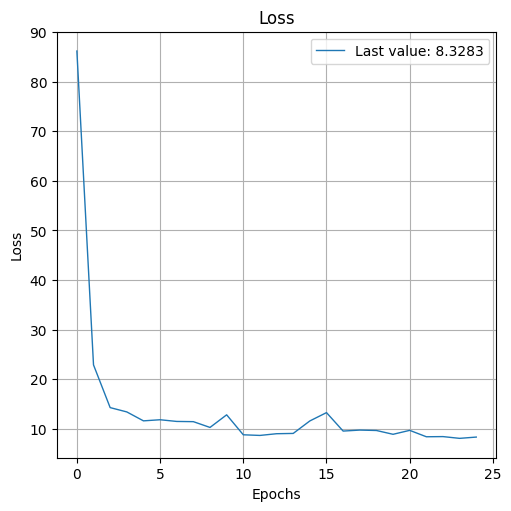

The final model has 100 neurons per hidden layer


In [ ]:
output = 2
initial = 32 #set the starting number of neurons
neurons = initial 
epoch = 25

threshold = 2.0
err = threshold + 2.0 #establishing the threshold for the Squared Error Loss ERROR based stopping criteria
errores = [err, err]
avg_error = np.mean(np.array(errores))


while(avg_error > threshold):
    results = run(in_2d_train, out_2d_train, in_2d_test, out_2d_test, neurons, output, epoch)
    errores = results[0]
    avg_error = round(np.mean(np.array(errores)), 2)
    print("Squared Error Loss: ", avg_error)
    neurons += 2
    losses = results[1]

show_history(losses)
plot_history(losses)
plt.close()

print("The final model has {} neurons per hidden layer".format(neurons))

Now, the second model will be ran and its name will be "THE AXIS INDEPENDENT MODEL". This model is caracterized by taking the 7 attributes as input, and giving one output as one of the coordinates of the location of the mouse. Therefore, this model will be run two times per simulation, one for x-axis and another one for the y-axis. The point of using as input the x-axis data and the y-axis separately, that is to say, in separate models, is to check the influence of x-axis values on y-axis result and viceversa.  

So, for the coordinates in x-axis we run the model.

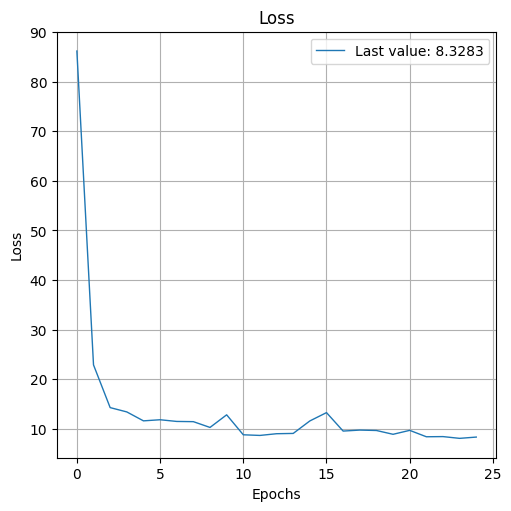

Squared Error Loss:  1.4


The final model has 16 neurons per hidden layer


In [ ]:

neurons = int(initial / 2)
output = 1


while(errores[0] > threshold):
    results = run(in_x_train, out_x_train, in_x_test, out_x_test, neurons, output, epoch)
    errores = results[0]
    neurons += 2
    losses = results[1]
 
show_history(losses)
plot_history(losses)
plt.close()
    
avg_error = round(np.mean(np.array(errores)), 2)
print("Squared Error Loss: ", avg_error)
print("\n")
print("The final model has {} neurons per hidden layer".format(neurons))

Now, we run it for the coordinates in y-axis.

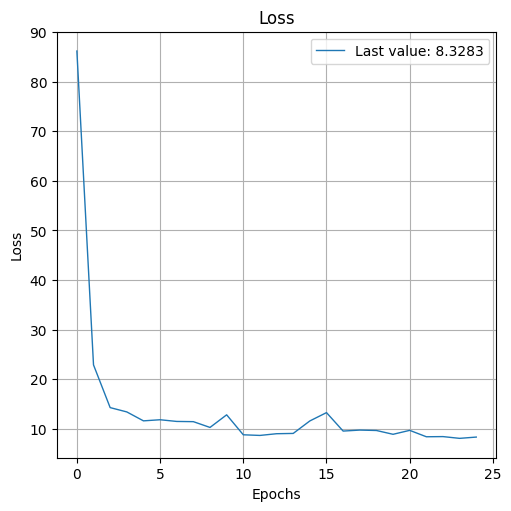

Squared Error Loss:  1.4


The final model has 16 neurons per hidden layer


In [ ]:
output = 1
neurons = int(initial / 2)


while(errores[0] > threshold):
    results = run(in_y_train, out_y_train, in_y_test, out_y_test, neurons, output, epoch)
    errores = results[0]
    neurons += 2
    losses = results[1]
    

show_history(losses)
plot_history(losses)
plt.close()
avg_error = round(np.mean(np.array(errores)), 2)
print("Squared Error Loss: ", avg_error)
print("\n")
print("The final model has {} neurons per hidden layer".format(neurons))